# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. 

Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Описание данных

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

## Оглавление

- [1 Изучение данных из файла](#1)
  - [1.1 Вывод](#1.1)
- [2 Предобработка данных](#2)
  - [2.1 Измененение типа данных](#2.1)
  - [2.2 Вывод](#2.2)
- [3 Расчёты и добавление результатов в таблицу](#3)
  - [3.1 Вывод](#3.1)
- [4 Исследовательский анализ данных](#4)
  - [4.1 Исследования параметров: площади, цены, числа комнат, высоты потолков](#4.1)
  - [4.2 Исследование количества времени для продажи квартиры](#4.2)
  - [4.3 Редкие и выбивающиеся значения](#4.3)
  - [4.4 Исследование факторов, влияющих на стоимость квартиры](#4.4)
  - [4.5 Анализ десяти населённых пунктов с наибольшим числом объявлений](#4.5)
  - [4.6 Анализ изменения цены по степени удалённости от центра](#4.6)
  - [4.7 Сравнение выводов по квартирам в центре и общих выводов по всему городу](#4.7)
- [5 Общий вывод](#5)
- [6 Чек-лист готовности проекта](#6)

## Изучение данных из файла 
<a id='1'></a>

In [2]:
#импортируем библиотеки
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

In [3]:
#откроем файл с данными и изучим общую информацию
pd.set_option('display.max_columns', None)
data = pd.read_csv('~/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


На первый взгляд - очень много пропущенных значений, посмотрим общую информацию

In [4]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Всего 23699 строк, 21 столбец. Есть столбцы с типом `bool(2)`, `float64(14)`, `int64(3)`, `object(3)`. Пропущенных значений действительно довольно много.

In [5]:
data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.86,5.68,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6541548.77,10887013.27,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,60.35,35.65,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.07,1.08,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.77,1.26,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,10.67,6.60,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,34.46,22.03,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.89,4.89,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,10.57,5.91,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.15,1.07,0.0,0.00,1.00,2.0,5.0


### Вывод
<a id='1.1'></a>

Для дальнейшего анализа необходимо заполнить пропущенные значения для столбцов, где это возможно, переименовать столбцы, изменить тип данных.

## Предобработка данных
<a id='2'></a>

In [6]:
#изменим формат даты в datetime.
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [7]:
#переименуем столбцы для одинакового, красивого отображения
data = data.rename(columns = {'cityCenters_nearest':'city_centers_nearest','parks_around3000':'parks_around_3000', 'ponds_around3000':'ponds_around_3000'})
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [8]:
#посмотрим сколько уникальных значений в столбце 'locality_name'
print(len(data['locality_name'].unique()))

#оставим в 'locality_name' только ту часть, которая начинается с большой буквы, чтобы уменьшить вероятность дублирования названий
data['locality_name'].replace(r'[^А-Я]*([А-Я].*)', r'\g<1>', inplace=True, regex=True)

#посмотрим сколько уникальных значений осталось
len(data['locality_name'].unique())

365


306

Уникальных значений осталось 306. Заполним столбец `locality_name` по совпадению 2х критериев (расстояние до центра города, расстояние до аэропорта), остальные заполним значением `unknown`.

In [10]:
#заполним столбец 'locality_name' по совпадению 2х критериев (расстояние до центра города, расстояние до аэропорта)
values = (data.groupby(['city_centers_nearest', 'airports_nearest'])
         .agg({'locality_name':'first'}).rename(columns={'locality_name':'locality_for_replace'}))

data = data.merge(values, how='left', on=['city_centers_nearest', 'airports_nearest'])
data.loc[data['locality_name'].isna(),'locality_name'] = data.loc[data['locality_name'].isna(),'locality_for_replace']

#удалим дополнительный столбец, он нам больше не нужен
data = data.drop(columns = ['locality_for_replace'])

#остальные заполним как 'unknown'
data.loc[data['locality_name'].isna(),'locality_name'] = 'unknown'

data['locality_name'].isna().sum()

0

In [11]:
#заполним пропуски в стобце 'balcony' на 0, если их не указали, вероятно их нет
data['balcony']= data['balcony'].fillna(0)

#заполним пропуски в стобце 'is_apartment' на значение False, так как такого вида жилья не так много, 
#вероятнее всего отсутствующее значение означает, что это не апартамены
data['is_apartment']= data['is_apartment'].fillna(False)

data['balcony'].isna().sum(), data['is_apartment'].isna().sum()

(0, 0)

пустых строк в столбце days_exposition: 13.42%


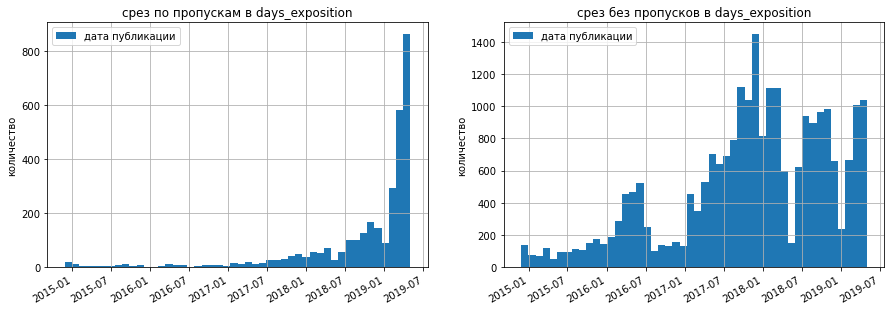

In [12]:
#построим гистограммы  для столбца first_day_exposition для двух срезов: для среза с пропусками в 
#days_exposition(сколько дней было размещено объявление от публикации до снятия) и среза без пропусков 

data_for_hist = data[data['days_exposition'].isna()]

fig, axes = plt.subplots(1,2, figsize=(15,5))

data_for_hist['first_day_exposition'].hist(bins=48,ax=axes[0])
axes[0].set_title('срез по пропускам в days_exposition')
axes[0].set_ylabel('количество')
axes[0].legend(['дата публикации'])

data['first_day_exposition'].hist(bins=48,ax=axes[1])
axes[1].set_title('срез без пропусков в days_exposition')
axes[1].legend(['дата публикации'])
axes[1].set_ylabel('количество')

fig.autofmt_xdate()

#посчитаем долю пустых строк в столбце 'days_exposition' в общем количестве строк
empty_row_exposition=(data['days_exposition'].isna().sum()/len(data['days_exposition'])*100).round(2)
print(f'пустых строк в столбце days_exposition: {empty_row_exposition}%')

Пропущенные значения в столбце `days_exposition` оставим как есть, так как по гистограмме видно, что большая часть из них максимально близка к конечной дате нашего датасета. Если их заполнить разницей между последним днем в датасете и датой опубликования, то это будет некорректно, ведь открытые объявления станут закрытыми 

In [13]:
#посчитаем отношение пустых строк в столбце 'ceiling_height' к общему, чтобы принять решение заполнять или нет
empty_row=(data['ceiling_height'].isna().sum()/len(data['ceiling_height'])*100).round(2)
print(f'Пустых строк в столбце ceiling_height: {empty_row}%')

Пустых строк в столбце ceiling_height: 38.8%


Доля пропусков слишком большая, чтобы заполнить ее медианой по всему столбцу, это создаст большой пик в медиане, что влияет на корреляцию и дисперсию. Т.к. замена пропусков прежде всего должна сохранять распределение, а уже потом заменять все пропуски, то лучше оставить пропуски как есть.

In [14]:
#посмотрим указана ли площадь кухни в студиях и квартирах с отрытой планировкой, если их нет, 
#то заполним значением 0, так как в студиях и квартирах с открытой планировкой кухня является частью жилой площади
display(data.pivot_table(index='studio', values= 'kitchen_area', aggfunc ='sum'))
data.pivot_table(index='open_plan', values= 'kitchen_area', aggfunc ='sum')

,kitchen_area
studio,
False,226415.84
True,0.00


,kitchen_area
open_plan,
False,226415.84
True,0.00


In [15]:
#пропуски в столбце 'kitchen_area' в студиях и квартирах с открытыми планировками заполним 0
data.loc[(data['kitchen_area'].isna()) & (data['studio']==True),'kitchen_area'] = 0
data.loc[(data['kitchen_area'].isna()) & (data['open_plan']==True),'kitchen_area'] = 0

#оставшиеся, заполним медианными значениями по критерию количество комнат
for room in data['rooms'].unique():
    median = data.loc[data['rooms'] == room, 'kitchen_area'].median()
    data.loc[(data['kitchen_area'].isna()) & (data['rooms'] == room), 'kitchen_area']= median

data['kitchen_area'].isna().sum()

0

In [16]:
#пропуски в столбце 'living_area' заполним средними значениями по совпадению двух столбцов 'total_area'и 'rooms'
#gb = data.groupby(['total_area','rooms'])
#data['living_area'] = data['living_area'].fillna(gb['living_area'].transform(lambda group: group.mean() / (group.name[0])) * data['total_area'])

#Пропуски в столбце 'living_area' заполним медианными значениями по всему столбцу
data.loc[data['living_area'].isna(), 'living_area'] = data['living_area'].median()
data['living_area'].isna().sum()

0

In [17]:
#проверим, что после заполнения не появились строки, где жилая площадь больше, чем общая
len(data.loc[data['living_area']>data['total_area'],'living_area'])

77

In [18]:
#заполним эти строки значением из столбца с общей площадью
data.loc[data['living_area']>data['total_area'],'living_area'] = data.loc[data['living_area']>data['total_area'],'total_area']
#проверим
len(data.loc[data['living_area']>data['total_area'],'living_area'])

0

In [19]:
#данные по столбцу floors_total восстановить нет возможности. Их всего 84 (менее 1%) - это не повлияет на результаты, 
#поэтому можем удалить эти строки
data=data.dropna(subset=['floors_total'])
data.shape

(23613, 22)

In [20]:
#остальные пропуски не можем ничем заполнить, поэтому оставим их как есть
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9118
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5532
city_centers_nearest     5509
parks_around_3000        5508
parks_nearest           15568
ponds_around_3000        5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

### Измененение типа данных
<a id='2.1'></a>

In [21]:
#преобразуем столбцы last_price','floors_total','balcony' из float64 в int64
columns = ['last_price','floors_total','balcony']
for column in columns:
    try:
        data[column] = data[column].astype('int64')
    except:
        print(f'Не получается преобразовать {column} в int64!')

### Вывод
<a id='2.2'></a>

- Изменили формат даты в `datetime`.
- Переименовали столбцы для одинакового, красивого отображения
- Заполнили столбец `locality_name` по совпадению 2х критериев (расстояние до центра города, расстояние до аэропорта).
- Заполнили пропуски в стобце `balcony` на 0
- Заполнили пропуски в стобце `is_apartment` на значение `False`.
- Заполнили пропущенные значения в столбце `days_exposition` (сколько дней было размещено объявление от публикации до снятия) разницей между самой последней датой размещения в датасете и датой размещения, так последний день размещения является конечной датой в датасете.
- Пропуски в столбце `ceiling_height` (высота потолков) оставили как есть, так как их доля слишком велика (38%) и замена медианой приведет к пикам.
- Пропуски в столбце `kitchen_area` для студий и квартир с открытой планировкой заполнили значением 0, так как в студиях и квартирах с открытой планировкой кухня является частью общей площади и площадь кухни отдельно не указывается. Оставшиеся, заполнили медианными значениями по критерию количество комнат
- Пропуски в столбце `living_area` заполнили средними значениями по всему столбцу
- Пропуски по столбцу `floors_total` восстановить не удалось, 84 строки (менее 1%) было решено удалить.
- Остальные пропуски оставили их как есть, так как заменить их нечем.

## Расчёты и добавление результатов в таблицу
<a id='3'></a>

In [22]:
#добавим столбец с ценой за квадратный метр, округлим до целых
data['price_per_metr'] = (data['last_price']/data['total_area']).round(0)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_metr
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,False,False,11.0,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82921.0
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92786.0
3,0,64900000,159.0,2015-07-24,3,NaN,14,30.0,9,False,False,False,9.5,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0


In [23]:
#посмотрим, что со средними и медианными значениями в столбце с ценами за квадратный метр
report_price_per_metr = data.pivot_table(index='locality_name', values='price_per_metr', aggfunc = ['count','median','mean']).round(2)
report_price_per_metr.columns = ['count','median','mean']
report_price_per_metr = report_price_per_metr.sort_values(by='count',ascending=False)
report_price_per_metr

,count,median,mean
locality_name,,,
Санкт-Петербург,15669,104762.0,114848.42
Мурино,586,86250.5,86041.11
Кудрово,470,95555.0,95260.87
Шушары,439,76829.0,78551.36
Всеволожск,398,65789.0,68654.47
...,...,...,...
Пчевжа,1,18148.0,18148.00
Пчева,1,26829.0,26829.00
Большой Сабск,1,16453.0,16453.00


Самая высокая медианная цена за квадратный метр в Санкт-Петербурге - 104 762 рубля, самая низкая 34932 рубля. Средние цены не сильно отличаются от медианных. Значит с ценами все более ли менее в порядке.

In [24]:
#добавим столбец по этажам со значениями 'первый', 'последний', 'другой'
def floors_cat(row):
    if row['floor']==1:
        return 'первый'
    if row['floor']==row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
data['floors_category']=data.apply(floors_cat, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_metr,floors_category
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0,другой
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,False,False,11.0,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82921.0,первый
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92786.0,другой
3,0,64900000,159.0,2015-07-24,3,NaN,14,30.0,9,False,False,False,9.5,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.0,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,другой


In [25]:
#добавим столбец с днем недели
data['exposition_weekday'] = data['first_day_exposition'].dt.day_name()
report_weekday=data.pivot_table(index='exposition_weekday', values='last_price', aggfunc='count')
report_weekday.columns = ['count']
report_weekday['%'] = report_weekday['count']/report_weekday['count'].sum()*100
report_weekday.sort_values(by='count', ascending=False).round(0)

,count,%
exposition_weekday,,
Thursday,4285,18.0
Tuesday,4170,18.0
Friday,3988,17.0
Wednesday,3956,17.0
Monday,3602,15.0
Saturday,1922,8.0
Sunday,1690,7.0


Чаще всего объявления размещались в четверг и вторник: 18%, реже всего в воскресенье: 7%.

In [26]:
#добавим столбец с месяцем размещения
data['exposition_month'] = data['first_day_exposition'].dt.month_name()
report_month=data.pivot_table(index='exposition_month', values='last_price', aggfunc='count')
report_month.columns = ['count']
report_month.sort_values(by='count', ascending=False)
report_month['%'] = report_month['count']/report_month['count'].sum()*100
report_month.sort_values(by='count', ascending=False).round(0)

,count,%
exposition_month,,
February,2637,11.0
March,2580,11.0
November,2364,10.0
April,2362,10.0
October,2111,9.0
September,1974,8.0
June,1752,7.0
August,1741,7.0
July,1690,7.0


Больше всего объявлений размещено в феврале и марте: 11% от общего количества, меньше всего в мае и январе: 5% и 6% соответственно.

In [27]:
#добавим столбец с годом размещения
data['exposition_year'] = data['first_day_exposition'].dt.year

#посмотрим статистику размещения по годам через сводную таблицу
report_year=data.pivot_table(index='exposition_year', values='last_price', aggfunc='count')
report_year.columns = ['count']
report_year.sort_values(by='count', ascending=False)
report_year['%'] = report_year['count']/report_year['count'].sum()*100

#найдем последнюю и первую даты размещения, чтобы понять насколько данные полные по годам
firt_date = data['first_day_exposition'].min()
print(f'Первая дата размещения:{firt_date}')
last_date = data['first_day_exposition'].max()
print(f'Последняя дата размещения:{last_date}')

report_year.sort_values(by='count', ascending=False).round(0)

Первая дата размещения:2014-11-27 00:00:00
Последняя дата размещения:2019-05-03 00:00:00


,count,%
exposition_year,,
2018,8492,36.0
2017,8166,35.0
2019,2871,12.0
2016,2763,12.0
2015,1184,5.0
2014,137,1.0


Данные содержат максимальное количество объявлений за 2018 год: 36%. Меньше всего за 2014 год, всего 1%.
Первая дата размещения: 27 ноября 2014 года, последняя дата размещения: 3 мая 2019, поэтому за 2014 и 2019 год данные неполные. В целом, если не учитывать данные за 2014 и 2019 года, то прослеживается динамика роста ежегодно:более  чем в 2 раза с 2015 на 2016 и почти в 3 раз с 2016 на 2017. С 2017 года рост прекратился, количество объявлений за 2017 и 2018 года практически одинаковое. 

In [28]:
#соотношение жилой площади к общей площади
data['ratio_living']=data['living_area']/data['total_area']
data['ratio_living'].describe().round(2)

count    23613.00
mean         0.57
std          0.12
min          0.02
25%          0.49
50%          0.57
75%          0.64
max          1.00
Name: ratio_living, dtype: float64

Максимальное значение 1, средняя и медиана одинаковые. Похоже на правду.

In [29]:
#отношение площади кухни к общей
data['ratio_kitchen']=data['kitchen_area']/data['total_area']
data['ratio_kitchen'].describe().round(2)

count    23613.00
mean         0.19
std          0.08
min          0.00
25%          0.13
50%          0.17
75%          0.23
max          0.79
Name: ratio_kitchen, dtype: float64

Среднее и медианные примерно на одном уровне. В целом все ок.

In [30]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  int64         
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        14495 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           23613 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          23613 non-null  float64       
 13  balcony         

### Вывод
<a id='3.1'></a>

- Самая высокая медианная цена за квадратный метр в Санкт-Петербурге - 104 762 рубля, самая низкая в поселке Высокоключевой - 34 932 рубля. 
- Чаще всего объявления размещались в четверг и вторник: 18%, реже всего в воскресенье: 7%.
- Больше всего объявлений размещено в феврале и марте: 11% от общего количества, меньше всего в мае и январе: 5% и 6% соответственно.
- Прослеживается динамика роста количества размещенных объявлений:более  чем в 2 раза с 2015 на 2016 и почти в 3 раз с 2016 на 2017. С 2017 года рост прекратился, количество объявлений за 2017 и 2018 года практически одинаковое, экономический кризис сказался на рынке недвижимости. 
- Жилая площадь может быть как равной общей площади так и меньше вполовину.
- Площадь кухни может занимать до 80 % общей площади, это кажется странным.

## Исследовательский анализ данных
<a id='4'></a>

### Исследование площади, цены, числа комнат, высоты потолков
<a id='4.1'></a>

count    23613.0
mean        60.0
std         36.0
min         12.0
25%         40.0
50%         52.0
75%         70.0
max        900.0
Name: total_area, dtype: float64

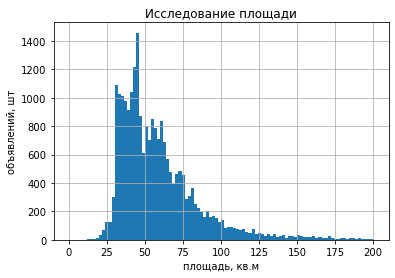

In [31]:
#параметр: площадь
data['total_area'].hist(bins=100, range=(0,200))

plt.ylabel('объявлений, шт')
plt.xlabel('площадь, кв.м')
plt.title('Исследование площади')

data['total_area'].describe().round(0)

Больше всего объявлений с площадью в диапазоне от 30 до 75 квадратных метров.

count        23613.0
mean       6540555.0
std       10901723.0
min          12190.0
25%        3400000.0
50%        4650000.0
75%        6799000.0
max      763000000.0
Name: last_price, dtype: float64

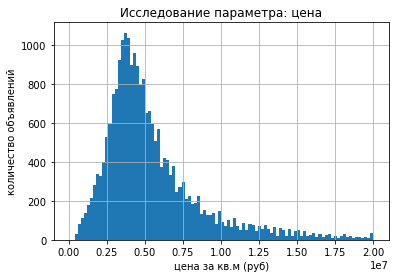

In [32]:
#параметр:цена
data['last_price'].hist(bins=100, range = (0, 20000000))

plt.ylabel('количество объявлений')
plt.xlabel('цена за кв.м (руб)')
plt.title('Исследование параметра: цена')

data['last_price'].describe().round(0)

Основная вилка цен расположена в диапазоне от 2,5 млн до 10 млн. рублей. Максимальная цена 763 млн. рублей, но это скорее аномалия. Это также можно увидеть по тому как сильно отличается средняя цена от медианной, почти в 1,5 раза.

count    23613.0
mean         2.0
std          1.0
min          0.0
25%          1.0
50%          2.0
75%          3.0
max         19.0
Name: rooms, dtype: float64

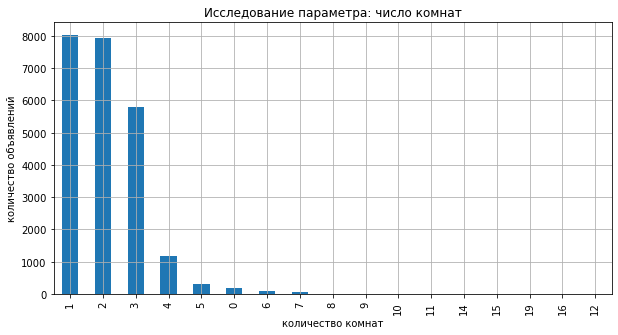

In [33]:
#параметр: число комнат
data['rooms'].value_counts().plot(y ='rooms', kind='bar', grid=True, figsize=(10, 5))

plt.ylabel('количество объявлений')
plt.xlabel('количество комнат')
plt.title('Исследование параметра: число комнат')

data['rooms'].describe().round(0)

Как видно по гистограмме, больше всего квартир, где комнат от 1 до 3. Аномально большие квартиры с 19 комнатами тоже присутствуют. Возможно это опечатка, где по ошибке ввели данные о площади кухни, например.

count    14495.00
mean         2.77
std          1.26
min          1.00
25%          2.52
50%          2.65
75%          2.80
max        100.00
Name: ceiling_height, dtype: float64

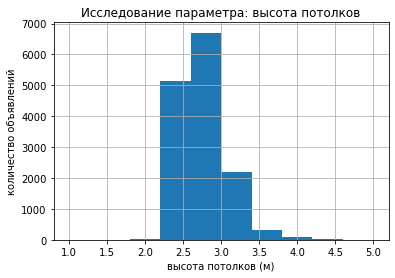

In [34]:
#параметр: высота потолков
data['ceiling_height'].hist(bins=10,range = (1, 5))

plt.ylabel('количество объявлений')
plt.xlabel('высота потолков (м)')
plt.title('Исследование параметра: высота потолков')

data['ceiling_height'].describe().round(2)

Чаще всего встречаются квартиры с высотой потолка от 2,65 до 3 метров. Выбросами в данном случае являются значения более 4,5 метров. Это явно какая-то ошибка. Цифры больше похожи на площадь.

### Выводы

- Больше всего объявлений с квартирами площадью в диапазоне от 30 до 75 квадратных метров.
- Основная вилка цен расположена в диапазоне от 2,5 млн до 10 млн. рублей. 
- Максимальное количество кваритир с количеством комнат от 1 до 3 и чуть меньше 4х комнатных, и совсем малая доля квартир, где комнат больше, чем 4.
- Квартиры с высотой потолка от 2,65 до 3 метров являются преобладающими с данных, нормальный диапазон от 2 до 4,5 м.


### Исследование количества времени для продажи квартиры
<a id='4.2'></a>

В данном исследовании мы изучим:
- Время продажи квартиры. 
- Построим гистограмму. 
- Посчитаем среднее и медиану. 
- Посмотрим сколько обычно занимает продажа: когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [35]:
#изучим время продажи, посмотрим среднюю и медиану
data['days_exposition'].describe().round(2)

count    20441.00
mean       180.88
std        219.69
min          1.00
25%         45.00
50%         95.00
75%        232.00
max       1580.00
Name: days_exposition, dtype: float64

Очень большая разница между средним и медианным значением, среднее время 180 дней, тогда как медианное всего 95 дней. Также очень большое значение показателя отклонения - 219. Это значит, что на среднюю повлияли аномально большие значения. Максимальное значение 1580 дней.

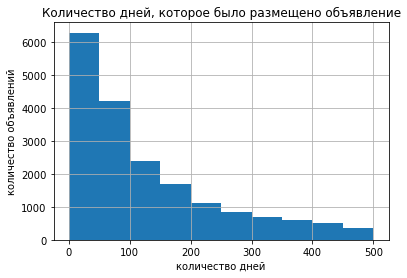

In [36]:
#построим гистограмму
data['days_exposition'].hist(bins=10,range=(0,500))

plt.ylabel('количество объявлений')
plt.xlabel('количество дней')
plt.title('Количество дней, которое было размещено объявление')

plt.show()

По гистограмме видно, что чаще всего квартира продается в срок до 100 дней.

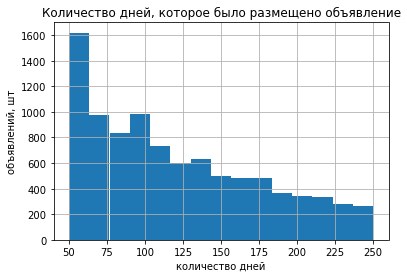

In [37]:
#посмотрим максимальные значения
data['days_exposition'].hist(bins=15,range=(50,250))

plt.ylabel('объявлений, шт')
plt.xlabel('количество дней')
plt.title('Количество дней, которое было размещено объявление')

plt.show()

Примерно после 60 дней резкое падение. В целом, значение укладывется в 60.

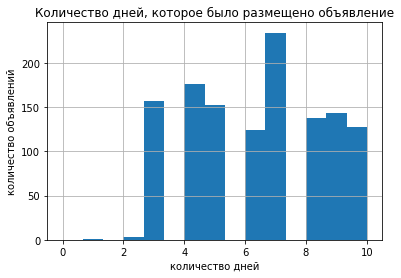

In [38]:
#посмотрим минимальные значения
data['days_exposition'].hist(bins=15,range=(0,10))

plt.ylabel('количество объявлений')
plt.xlabel('количество дней')
plt.title('Количество дней, которое было размещено объявление')

plt.show()

Необычно быстро - это менее 3х дней

### Общий вывод:

В результате исследования мы выяснили, что продажа квартиры могла занять от 0 до 1580 дней, но чаще всего продажа происходила за 3-60 дней. Такую продажу можно считать быстрой. Продажу от 60 до 90 дней - средней, более 150 дней - необычно долгой, а продажу менее 3х дней - очень быстрой.

### Редкие и выбивающиеся значения
<a id='4.3'></a>

Уберем редкие и выбивающиеся значения.

In [39]:
#посмотрим столбец с количеством комнат, выясним количество уникальных значений
data['rooms'].value_counts()

1     8015
2     7913
3     5795
4     1177
5      325
0      194
6      104
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

In [40]:
#посмотрим количество строк со значением более и включая 6 комнат:
len(data.query('rooms>=6'))

194

In [41]:
#посмотрим отношение к общему числу
(len(data.query('rooms>=6')))/(len(data))*100

0.821581332316944

Менее 1%, можно смело оставить только те, что больше 5 комнат, это не повлияет на выборку

In [42]:
good_data = data.query('rooms<=5')
print(len(good_data))

23419


In [43]:
#по высоте потолков судя по гистограмме значениями кажется диапазон от 2 до 4.5 метров, 
#посмотрим сколько выходит за рамки этого значения

len(good_data.query('ceiling_height<2 or ceiling_height>4.5'))

43

In [44]:
#сколько это в процентах?
(len(good_data.query('ceiling_height<2 or ceiling_height>4.5')))/(len(good_data))*100

0.18361159742089755

In [45]:
#менее 1%, можно оставить только те, что равны или в пределах этих значений
final_data = good_data.query('ceiling_height>=2 and ceiling_height<=4.5')
len(final_data)

14314

In [46]:
#посмотрим столбец с ценой
final_data['last_price'].describe().round()

count        14314.0
mean       6492748.0
std        7894651.0
min          12190.0
25%        3550000.0
50%        4800000.0
75%        6990000.0
max      330000000.0
Name: last_price, dtype: float64

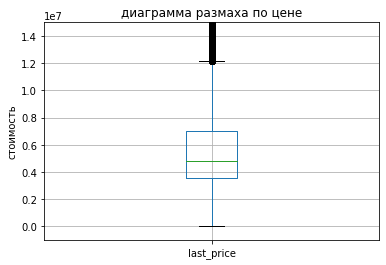

In [47]:
#построим диаграмму размаха для того, чтобы определить выбросы по цене
price_pivot = final_data[['locality_name','last_price']].boxplot()
plt.ylim(-1000000, 15000000)

plt.ylabel('стоимость')
plt.title('диаграмма размаха по цене')

plt.show()

Как видим верхняя граница примерно на 12 000 000 р, но убирать строки с выбивающимися ценами не считаю целесообразным, так как это может повлиять на дальнейший анализ данных по Санкт-Петербургу.

### Общий вывод:

- В результате исследования редких и выбивающихся значений отсекли выбросы и выбивающиеся значения в столбце с количеством комнат.

- Обнаружили, что 5ти и более - комнатных квартир в общей массе менее чем 1%. 

- Высота потолков варьируется от 2м до 4,5м включительно.

- Посмотрели диаграмму размаха по ценам, определили, что верхняя граница по ценам по всему набору данных в районе 12 000 000 рублей, но приняли решение не отсекать, чтобы сохранить полноту данных.

### Исследование факторов, влияющих на стоимость квартиры
<a id='4.4'></a>

Изучим факторы, которые могут повлиять на стоимость квадратного метра и узнаем:
- Зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. 
- Зависит ли цена от даты размещения: дня недели, месяца и года. 
- Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. 
- Выделим населённые пункты с самой высокой и низкой стоимостью жилья.

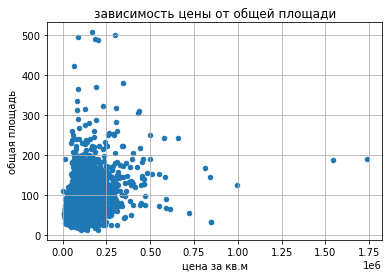

In [48]:
#зависит ли цена от общей площади
final_data.plot(x = 'price_per_metr', y = 'total_area', kind='scatter', grid=True)   

plt.ylabel('общая площадь')
plt.xlabel('цена за кв.м')
plt.title('зависимость цены от общей площади')

plt.show()

До 200 метров зависимость максимально коррелирует с ростом цены, а дальше начинает рассеивается, что значит, о том, что начинают влиять другие факторы

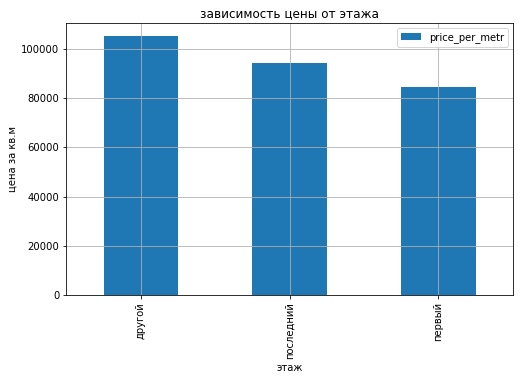

In [70]:
#зависит ли цена от этажа
final_data.pivot_table(index='floors_category', values='price_per_metr', aggfunc='mean').sort_values(by='price_per_metr', ascending=False).plot(y='price_per_metr', kind='bar', grid=True, figsize=(8, 5))

plt.ylabel('цена за кв.м')
plt.xlabel('этаж')
plt.title('зависимость цены от этажа')

plt.show()

Как видим цены за первый этаж заметно ниже других, а последний этаж влияет меньше.

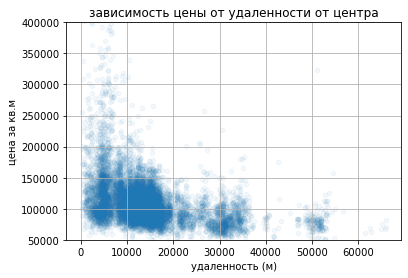

In [50]:
#зависит ли цена от удаленности от центра
final_data.plot(x = 'city_centers_nearest', y = 'price_per_metr', ylim = (50000, 400000),kind='scatter', grid=True, alpha=0.05)

plt.ylabel('цена за кв.м')
plt.xlabel('удаленность (м)')
plt.title('зависимость цены от удаленности от центра')

plt.show()

Зависимость обратная, чем расстояние от центра меньше, тем стоимость выше

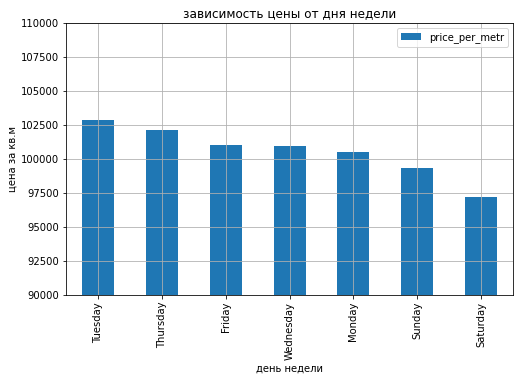

In [69]:
#зависимость цены от даты размещения: дня недели

final_data.pivot_table(index='exposition_weekday', values='price_per_metr', aggfunc='mean').sort_values(by='price_per_metr', ascending=False).plot(y='price_per_metr', ylim = (90000, 110000), kind='bar', grid=True, figsize=(8, 5))

plt.ylabel('цена за кв.м')
plt.xlabel('день недели')
plt.title('зависимость цены от дня недели')

plt.show()

В среднем самая низкая цена за квадратный метр в субботу, а самая высокая во вторник.

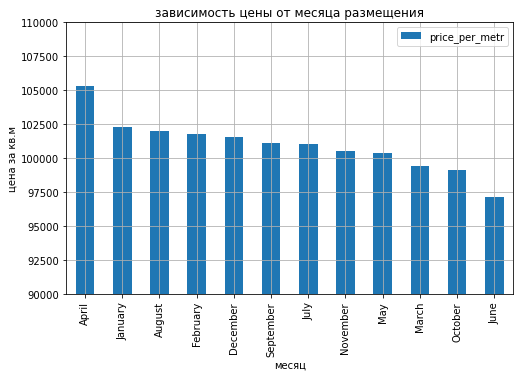

In [68]:
#зависимость цены от даты размещения: от месяца 
final_data.pivot_table(index='exposition_month', values='price_per_metr', aggfunc='mean').sort_values(by='price_per_metr', ascending=False).plot(y='price_per_metr', ylim = (90000, 110000), kind='bar', grid=True, figsize=(8, 5))

plt.ylabel('цена за кв.м')
plt.xlabel('месяц')
plt.title('зависимость цены от месяца размещения')

plt.show()

Максимальная цена за квадратный метр в апреле, а самая низкая в июне и октябре.

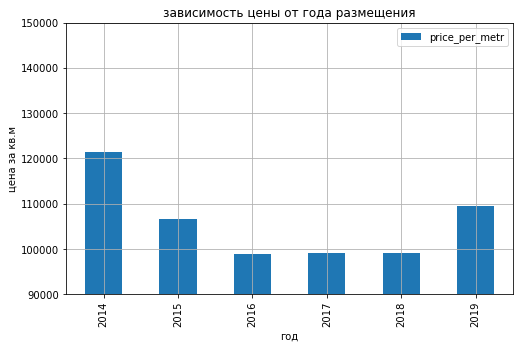

In [53]:
#зависимость цены от даты размещения: года
final_data.pivot_table(index='exposition_year', values='price_per_metr', aggfunc='mean').plot(y='price_per_metr', ylim = (90000, 150000), kind='bar', grid=True, figsize=(8, 5))

plt.ylabel('цена за кв.м')
plt.xlabel('год')
plt.title('зависимость цены от года размещения')

plt.show()

Цена за квадратный метр была самой дорогой в 2014 году. Дальше цена снижается до 2017 и начинает снова расти в 2018. 

### Выводы

- Общая площадь: цена за квадратный метр растет вместе с ростом общей площади до отметки в 200 квадратных метров.

- Этаж: квартиры не на первом и не на последнем этаже дороже всего. Цена квадратного метра квартиры на первом этаже находится в районе 80 000 рублей, тогда как на последнем: около 90000 рублей. Остальные этажи уже стоят более чем 100 000 рублей за квадратный метр.

- Расстояние от центра: зависимость обратная: чем меньше расстояние от центра, тем выше цена.

- День недели: самая низкая средняя цена за квадратный метр в субботу, а самая высокая во вторник.

- Месяц: максимальная цена за квадратный метр в апреле, а самая низкая в июне и октябре.

- Год: цена за квадратный метр была самой дорогой в 2014 году. Дальше цена снижается до 2017 и начинает снова расти в 2018.

### Анализ десяти населённых пунктов с наибольшим числом объявлений
<a id='4.5'></a>

In [54]:
# 10 населённых пунктов с наибольшим числом объявлений
top_10 = final_data['locality_name'].value_counts().head(10)
top_10

Санкт-Петербург    9936
Всеволожск          272
Пушкин              233
Мурино              226
Шушары              216
Колпино             203
Кудрово             195
Гатчина             148
Петергоф            145
Парголово           137
Name: locality_name, dtype: int64

In [55]:
#посмторим на среднюю цену квадратного метра в этих населённых пунктах. 
#выделите населённые пункты с самой высокой и низкой стоимостью жилья из 10 с максимальным количеством объявлений.

top_10_data=final_data.query('locality_name in @top_10.index')
top_10_data_pivot=top_10_data.pivot_table(index='locality_name', values='price_per_metr', aggfunc='mean').round(2)
top_10_data_pivot.sort_values(by='price_per_metr', ascending=False)

,price_per_metr
locality_name,
Санкт-Петербург,115103.82
Пушкин,104065.56
Кудрово,96098.42
Парголово,90901.32
Мурино,87773.17
Петергоф,85554.13
Шушары,79286.48
Колпино,75938.53
Гатчина,70024.91


Самая высокая цена за квадратный метр в Санкт Петербурге: 114 260 рублей, самая низкая в Выборге - 58 141 рублей.

### Анализ изменения цены по степени удалённости от центра
<a id='4.6'></a>

Для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге. Наша задача — выяснить, какая область входит в центр.

Для этого создадим столбец с расстоянием до центра в километрах. После этого посчитаем среднюю цену для каждого километра. Построем график: он будет показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона.

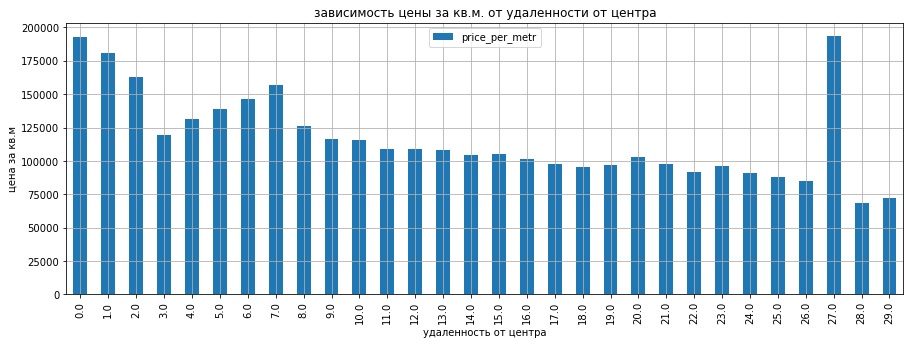

In [56]:
#выделим квартиры в Санкт-Петербурге
data_spb=pd.DataFrame(final_data.query('locality_name == "Санкт-Петербург"'))

#создадим столбец с расстоянием до центра в километрах: округлим до целых значений
data_spb['city_centers_spb'] = data_spb['city_centers_nearest'].div(1000).round(0)

data_spb.pivot_table(index='city_centers_spb', values='price_per_metr', aggfunc='mean').round(0).plot(y='price_per_metr', kind='bar',grid=True, title = 'зависимость цены за кв.м. от удаленности от центра', figsize=(15, 5))
plt.ylabel('цена за кв.м')
plt.xlabel('удаленность от центра')

plt.show()

Цена сильно меняется при удаленности в 1 км и 3 км, далее на 7м километре. Поэтому можно сказать, область до 7ми км входит в центр.

## Сравнение выводов по квартирам в центре и общих выводов по всему городу
<a id='4.7'></a>

Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Выясним - отличаются ли они от общих выводов по всему городу?

In [57]:
#выделим сегмент квартир в центре
data_spb_center = pd.DataFrame(data_spb.query('city_centers_spb<=7'))
len(data_spb_center)

2162

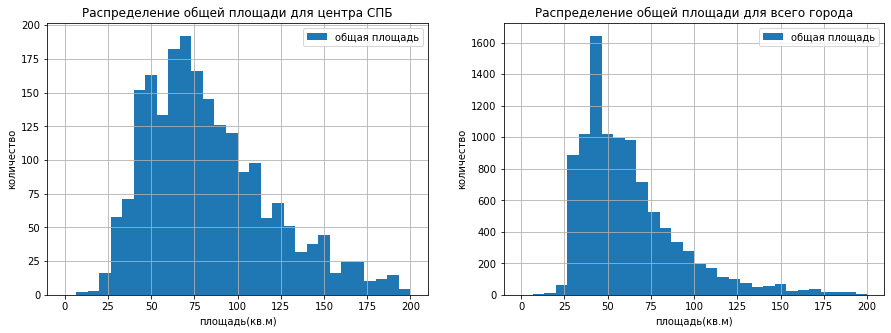

In [58]:
#сравним параметр общая площадь по центру и по всему городу

fig, axes = plt.subplots(1,2, figsize=(15,5))

data_spb_center['total_area'].hist(bins=30, range=(0,200), ax=axes[0])
data_spb['total_area'].hist(bins=30, range=(0,200), ax=axes[1])

axes[0].set_title('Распределение общей площади для центра СПБ')
axes[0].legend(['общая площадь'])
axes[0].set_ylabel('количество')
axes[0].set_xlabel('площадь(кв.м)')

axes[1].set_title('Распределение общей площади для всего города')
axes[1].legend(['общая площадь'])
axes[1].set_ylabel('количество')
axes[1].set_xlabel('площадь(кв.м)')

plt.show()

Text(0.5, 1.0, 'Распределение площади для не-центра СПБ')

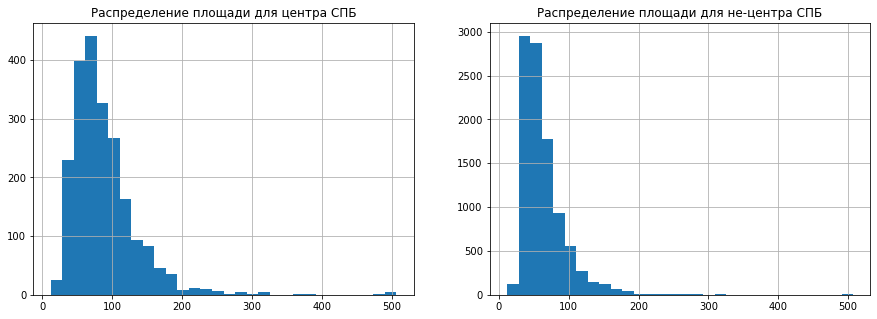

In [59]:
# Код ревьюера

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2, figsize=(15,5))

data_spb_center['total_area'].hist(bins=30, ax=axes[0])
data_spb['total_area'].hist(bins=30, ax=axes[1])

axes[0].set_title('Распределение площади для центра СПБ')
axes[1].set_title('Распределение площади для не-центра СПБ')

В центральном районе преобладают квартиры в диапазоне от 25 до 125 кв.м, в отличии от квартрир по всему городу, где в основная масса сосредоточена до 80 кв.м. Пиковое количество в центре расположено между 50 и 75 кв.м., по всему городу - между 25 и 50.

Text(0.5, 0, 'цена за кв.м(руб)')

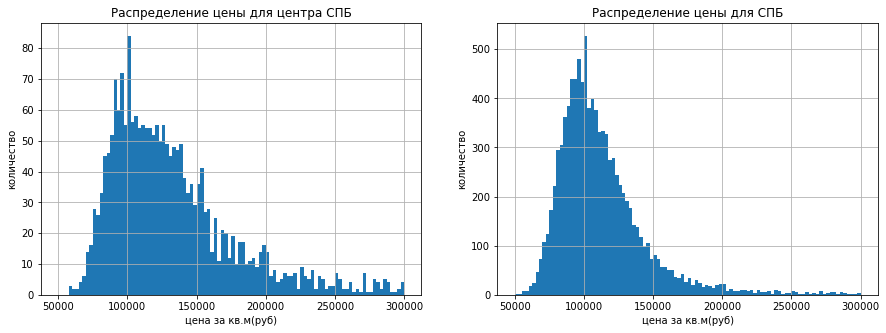

In [60]:
#цена
fig, axes = plt.subplots(1,2, figsize=(15,5))

data_spb_center['price_per_metr'].hist(bins=100, range=(50000,300000), ax=axes[0])
data_spb['price_per_metr'].hist(bins=100, range=(50000,300000), ax=axes[1])

axes[0].set_title('Распределение цены для центра СПБ')
axes[0].set_ylabel('количество')
axes[0].set_xlabel('цена за кв.м(руб)')

axes[1].set_title('Распределение цены для СПБ')
axes[1].set_ylabel('количество')
axes[1].set_xlabel('цена за кв.м(руб)')

Стоимость квадратного метра находится в диапазоне от 70 до 200 т.р. в центре. Немного меньше по всему городу: от 70 до 150 т.р. 

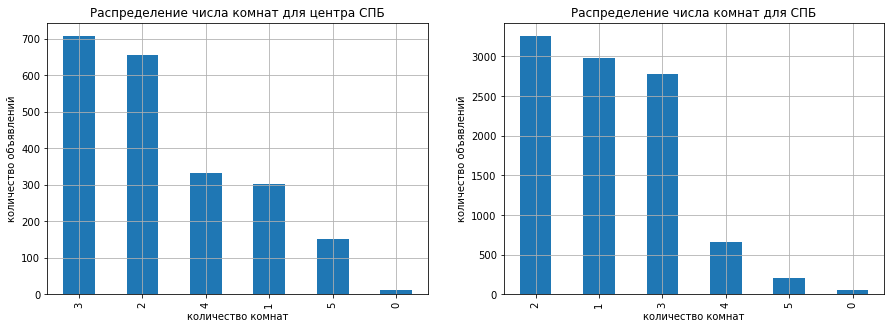

In [61]:
#число комнат

fig, axes = plt.subplots(1,2, figsize=(15,5))

data_spb_center['rooms'].value_counts().plot(y ='rooms', kind='bar', grid=True, ax=axes[0])
data_spb['rooms'].value_counts().plot(y ='rooms', kind='bar', grid=True, ax=axes[1])

#data['rooms'].value_counts().plot(y ='rooms', kind='bar', grid=True, figsize=(10, 5))

axes[0].set_title('Распределение числа комнат для центра СПБ')
axes[0].set_ylabel('количество объявлений')
axes[0].set_xlabel('количество комнат')

axes[1].set_title('Распределение числа комнат для СПБ')
axes[1].set_ylabel('количество объявлений')
axes[1].set_xlabel('количество комнат')

plt.show()

В центральном районе больше 3х и 2хкомнатных квартир, вдвое меньше 4х и 1комнатных, совсем мало студий. По всему городу больше всего 2х и 1комнатных квартир, доля 4хкомнатных существенно меньше, также меньше всего студий.

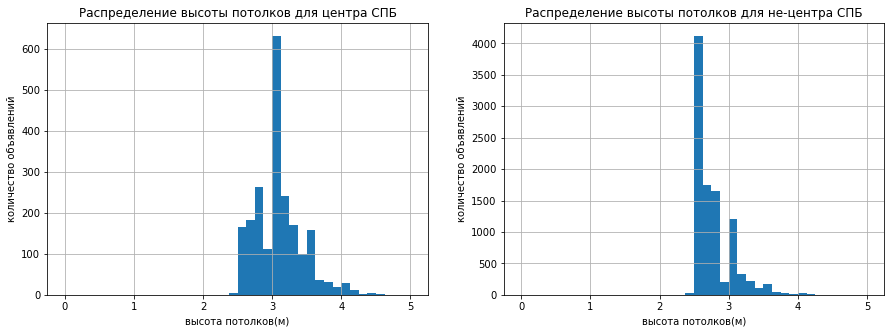

In [62]:
#высота потолков

fig, axes = plt.subplots(1,2, figsize=(15,5))

data_spb_center['ceiling_height'].hist(bins=40, range=(0,5), ax=axes[0])
data_spb['ceiling_height'].hist(bins=40, range=(0,5), ax=axes[1])

axes[0].set_title('Распределение высоты потолков для центра СПБ')
axes[0].set_ylabel('количество объявлений')
axes[0].set_xlabel('высота потолков(м)')

axes[1].set_title('Распределение высоты потолков для не-центра СПБ')
axes[1].set_ylabel('количество объявлений')
axes[1].set_xlabel('высота потолков(м)')

plt.show()

В центре также как и по всему городу высота потолков составляет от 2 до 4,5 метров, но в центре преобладают квартиры с высотой потолков больше 3 метров, а по всему городу меньше 3х.

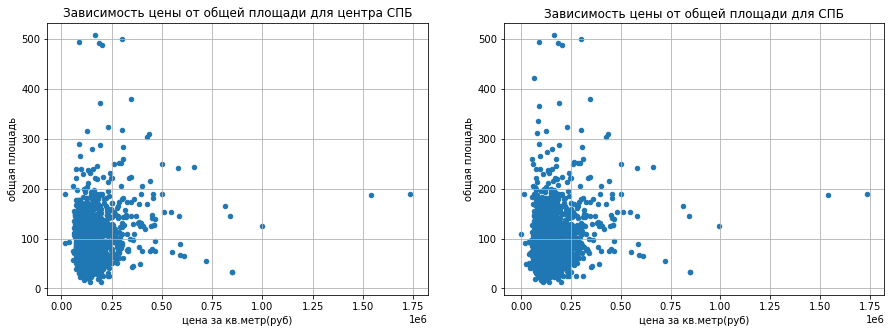

In [63]:
#зависит ли цена от общей площади
fig, axes = plt.subplots(1,2, figsize=(15,5))

data_spb_center.plot(x = 'price_per_metr', y = 'total_area', kind='scatter', grid=True, ax=axes[0]) 
axes[0].set_title('Зависимость цены от общей площади для центра СПБ')
axes[0].set_ylabel('общая площадь')
axes[0].set_xlabel('цена за кв.метр(руб)')

data_spb.plot(x = 'price_per_metr', y = 'total_area', kind='scatter', grid=True, ax=axes[1]) 
axes[1].set_title('Зависимость цены от общей площади для СПБ')
axes[1].set_ylabel('общая площадь')
axes[1].set_xlabel('цена за кв.метр(руб)')

plt.show()

До 200 метров зависимость максимально коррелирует с ростом цены примерно одинаково для центра и всего города.

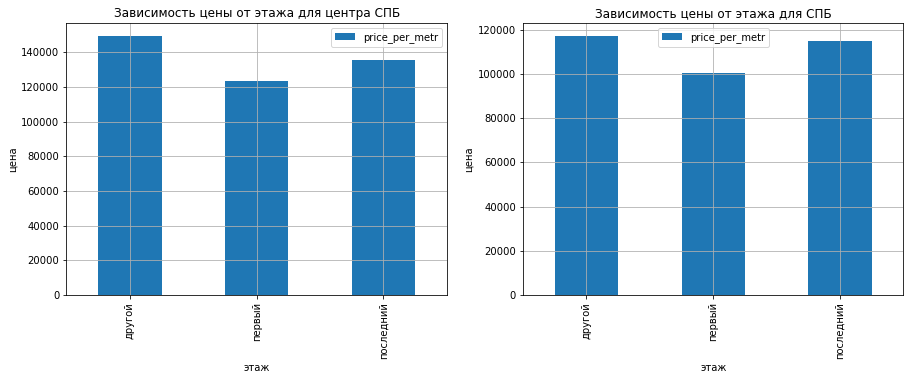

In [64]:
#зависит ли цена от этажа
fig, axes = plt.subplots(1,2, figsize=(15,5))

data_spb_center.pivot_table(index='floors_category', values='price_per_metr', aggfunc='mean').plot(y='price_per_metr', kind='bar', grid=True, ax=axes[0])
axes[0].set_title('Зависимость цены от этажа для центра СПБ')
axes[0].set_ylabel('цена')
axes[0].set_xlabel('этаж')

data_spb.pivot_table(index='floors_category', values='price_per_metr', aggfunc='mean').plot(y='price_per_metr', kind='bar', grid=True, ax=axes[1])
axes[1].set_title('Зависимость цены от этажа для СПБ')
axes[1].set_ylabel('цена')
axes[1].set_xlabel('этаж')

plt.show()

Как видим цены за первый этаж заметно ниже других, а последний этаж влияет меньше, зависимость одинаковая для центра и всего города.

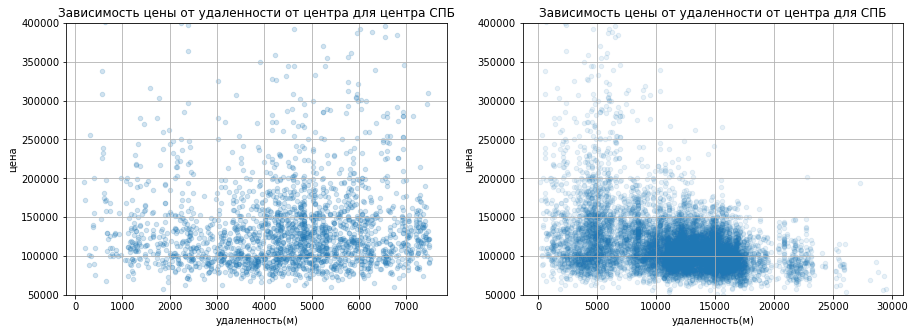

In [65]:
#зависит ли цена от удаленности от центра
fig, axes = plt.subplots(1,2, figsize=(15,5))

data_spb_center.plot(x = 'city_centers_nearest', y = 'price_per_metr', ylim = (50000, 400000),kind='scatter', grid=True, alpha=0.2, ax=axes[0])
axes[0].set_title('Зависимость цены от удаленности от центра для центра СПБ')
axes[0].set_ylabel('цена')
axes[0].set_xlabel('удаленность(м)')

data_spb.plot(x = 'city_centers_nearest', y = 'price_per_metr', ylim = (50000, 400000),kind='scatter', grid=True, alpha=0.1, ax=axes[1])
axes[1].set_title('Зависимость цены от удаленности от центра для СПБ')
axes[1].set_ylabel('цена')
axes[1].set_xlabel('удаленность(м)')

plt.show()

Зависимость обратная, чем расстояние от центра меньше, тем стоимость выше для всего города и цена примерно одинаковая вне зависимости от удаленности в случае с центром.

### Вывод

- В центральном районе преобладают квартиры в диапазоне от 25 до 125 кв.м, в отличии от квартрир по всему городу, где в основная масса сосредоточена до 80 кв.м. Пиковое количество в центре расположено между 50 и 75 кв.м., по всему городу - между 25 и 50.

- Стоимость квадратного метра находится в диапазоне от 70 до 200 т.р. в центре. Немного меньше по всему городу: от 70 до 150 т.р. 

- В центральном районе больше 3х и 2хкомнатных квартир, вдвое меньше 4х и 1комнатных, совсем мало студий. По всему городу больше всего 2х и 1комнатных квартир, доля 4хкомнатных существенно меньше, также меньше всего студий.

- В центре также как и по всему городу высота потолков составляет от 2 до 4,5 метров, но в центре преобладают квартиры с высотой потолков больше 3 метров, а по всему городу меньше 3х.

- Общая площадь до 200 метров максимально коррелирует с ростом цены примерно одинаково для центра и всего города.

- Цены за первый этаж заметно ниже других этажей, а последний этаж влияет на цену меньше. Ситуация одинаковая для центра и всего города.

- Зависимость цены от расстояния до центра обратная: чем меньше расстояние от центра, тем выше стоимость для всего города и цена примерно одинаковая вне зависимости от удаленности в случае с центром.

## Общий вывод
<a id='5'></a>

Мы исследовали данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 

Наша задачей было — установить параметры, для того, чтобы научиться определять рыночную стоимость объектов недвижимости с помощью автоматизированной системы, которая сможет отследить аномалии и мошенническую деятельность.

**Результаты исследования параметров: площади, цены, числа комнат, высоты потолков:**

- Больше всего объявлений с квартирами площадью в диапазоне от 30 до 75 квадратных метров.
- Основная вилка цен расположена в диапазоне от 2,5 млн до 10 млн. рублей.
- Максимальное количество кваритир с количеством комнат от 1 до 3 и чуть меньше 4х комнатных, и совсем малая доля квартир, где комнат больше, чем 4.
- Квартиры с высотой потолка от 2,65 до 3 метров являются преобладающими с данных, нормальный диапазон от 2 до 4,5 м.

**Исследование количества времени для продажи квартиры:**

- Продажа квартиры могла занять от 0 до 1500 дней, но чаще всего продажа происходила за 3-60 дней. Такую продажу можно считать быстрой. Продажу от 60 до 90 дней - средней, более 150 дней - необычно долгой, а продажу менее 3х дней - очень быстрой.

**Редкие и выбивающиеся значения:**

- Обнаружили, что 5ти и более - комнатных квартир в общей массе менее чем 1%. 

- Высота потолков варьируется от 2м до 4,5м включительно.

- Построили диаграмму размаха по ценам, определили, что верхняя граница по ценам по всему набору данных в районе 12 000 000 рублей, но приняли решение не отсекать, чтобы сохранить полноту данных.

**Исследование факторов, влияющих на стоимость квартиры:**

- Общая площадь: цена за квадратный метр растет вместе с ростом общей площади до отметки в 200 квадратных метров.

- Этаж: квартиры не на первом и не на последнем этаже дороже всего. Цена квадратного метра квартиры на первом этаже находится в районе 80 000 рублей, тогда как на последнем: около 90000 рублей. Остальные этажи уже стоят более чем 100 000 рублей за квадратный метр.

- Расстояние от центра: зависимость обратная: чем меньше расстояние от центра, тем выше цена.

- День недели: самая низкая средняя цена за квадратный метр в воскресенье, а самая высокая в четверг.

- Месяц: максимальная цена за квадратный метр в апреле, а самая низкая в июне и октябре.

- Год: цена за квадратный метр была самой дорогой в 2014 году. Дальше цена снижается до 2017 и начинает снова расти в 2018.

**Анализ десяти населённых пунктов с наибольшим числом объявлений:**

- 10 населенных пунктов с наимбольшим числом объявлений по убыванию: Санкт-Петербург, Мурино, Кудрово, Шушары, Всеволожск, Пушкин, Колпино, Парголово, Гатчина, Выборг

- Самая высокая цена за квадратный метр в Санкт Петербурге: 114 260 рублей, самая низкая в Выборге - 58 141 рублей.

**Анализ изменения цены по степени удалённости от центра:**

- Цена уменьшается на 7м километре. Поэтому можно сказать, что область до 7ми км входит в центр.

**Сравнение выводов по квартирам в центре и общих выводов по всему городу:**

- В центральном районе преобладают квартиры в диапазоне от 25 до 125 кв.м, в отличии от квартрир по всему городу, где в основная масса сосредоточена до 80 кв.м. Пиковое количество в центре расположено между 50 и 75 кв.м., по всему городу - между 25 и 50.

- Стоимость квадратного метра находится в диапазоне от 70 до 200 т.р. в центре. Немного меньше по всему городу: от 70 до 150 т.р. 

- В центральном районе больше 3х и 2хкомнатных квартир, вдвое меньше 4х и 1комнатных, совсем мало студий. По всему городу больше всего 2х и 1комнатных квартир, доля 4хкомнатных существенно меньше, также как и в центре - меньше всего студий.

- В центре также как и по всему городу высота потолков составляет от 2 до 4,5 метров, но в центре преобладают квартиры с высотой потолков больше 3 метров, а по всему городу меньше 3х.

- Общая площадь до 200 метров максимально коррелирует с ростом цены примерно одинаково для центра и всего города.

- Цены за первый этаж заметно ниже других этажей, а последний этаж влияет на цену меньше. Ситуация одинаковая для центра и всего города.

- Зависимость цены от расстояния до центра обратная: чем меньше расстояние от центра, тем выше стоимость для всего города и цена примерно одинаковая вне зависимости от удаленности в случае с центром.


## Чек-лист готовности проекта
<a id='6'></a>
Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод